## Assignment 2: $k$ Nearest Neighbor

### Do any four.

In [9]:
! git clone https://github.com/namithatholasi/scratchpad
%run ./scratchpad/get_data.py

fatal: destination path 'scratchpad' already exists and is not an empty directory.


<Figure size 640x480 with 0 Axes>

**Q1.** Please answer the following questions.
1. What is the difference between regression and classification?

**Regression and classification are both supervised learning methods, but they differ in what they predict. Regression predicts a continuous numerical value (like sales revenue), whereas classification predicts a categorica label (loan application being approved vs denied).**

2. What is a confusion table/matrix? What does it help us understand about a model's performance?

**A confusion table/matrix is a table used to evaluate the performance of a classification model. It compares the model's predicted labels to the actual, true labels.**


3. What is Accuracy? Why might it not be entirely sufficient to evaluate a classifer's predictive performance?

**Accuracy is the proportion of total predictions that the model gets correct. However, accuracy may not be sufficient to evaluate a classifier's predictive performance when classes are imbalanced. For example, if one class makes up most of the data, a model can predict the majority class every time and still achieve high accuracy, even if it does not correctly predict the minority class.**


4. What does the root mean squared error quantify about a particular model?

**The root mean squared error quantifies the average magnitude of a model's prediction errors in a regression problem. It measures how far on average the predicted values are from the actual values. Larger errors are penalized more heavily because the differences are squared before averaging. A lower root mean squared error shows that a model's predictions are closer to the true values and in turn more accurate.**

5. What are overfitting and underfitting?

**Overfitting is a modeling error in machine learning that occurs when a model learns the training data "too well" capturing noise and random fluctuations rather than underlying patterns.**

**Underfitting occurs when a model is too simple to capture underlying patterns in the data. It performs poorly on both the training data and new data because it fails to learn important relationships and connections.**

6. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or RMSE on the test set, improve model performance?

**Splitting the data into training and testing sets helps evaluate how well a model generalizes to new, unseen data. The model is trained on a training set, and then its performance is measured on the test set which it has not seen before. Choosing k based on accuracy or RSME on the test set helps select the value that performs best on unseen data rather than just the training data. This reduces the risk of overfitting because we are selecting the model that generalizes the best rather than just the one that fits the training data well**

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

**A strength of a class label is that it is simple and easy to understand because it gives one, clear answer. A weakness of a class label is that it does not tell you how confident the model is**

**A strength of a probability is that it shows you how confident the model is in each class. A weakness of using probabilities is that you still have to choose a cutoff (threshold) to turn the probability into a final class decision. Different thresholds can lead to different results.**

**Q2.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the relationships between the features (e.g. scatterplots, describe tables).
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for your best model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for hyper-parameter selection and evaluation.
4. Use the $k$-NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [10]:
#Q3.1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv("/content/data/USA_cars_datasets.csv")

df = df[["price", "year", "mileage"]].copy()

print("Head:")
print(df.head(), "\n")
print("Shape:", df.shape, "\n")


Head:
   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654 

Shape: (2499, 3) 



In [11]:
#Q3.1

print("Missing values per column:")
print(df.isna().sum(), "\n")

Missing values per column:
price      0
year       0
mileage    0
dtype: int64 



**Q3.1 Answer:**

**There are no missing values to handle!**

In [12]:
#Q3.2


#Separate features and target
X = df[["year", "mileage"]].copy()
Y = df["price"].copy()


#Maxmin scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

#Convert back to dataframe for easier viewing
X_scaled = pd.DataFrame(X_scaled, columns=["year", "mileage"])

#First five rows after min-max normalization
print("First 5 rows after Min-Max normalization:")
print(X_scaled.head())

First 5 rows after Min-Max normalization:
       year   mileage
0  0.744681  0.269287
1  0.808511  0.187194
2  0.957447  0.038892
3  0.872340  0.063016
4  0.957447  0.006537


In [13]:
#Q3.3

#80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    Y,
    test_size=0.20,
    random_state=1234

)

print("Training test shape: ", X_train.shape)
print("Test set shape: ", X_test.shape)

Training test shape:  (1999, 2)
Test set shape:  (500, 2)


k = 3, MSE = 121279913.90


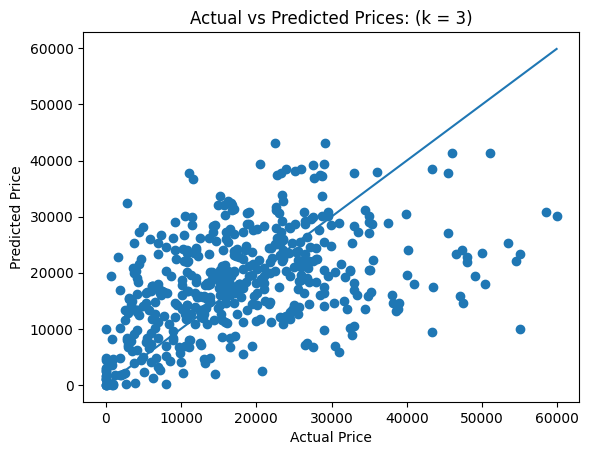

k = 10, MSE = 102016481.97


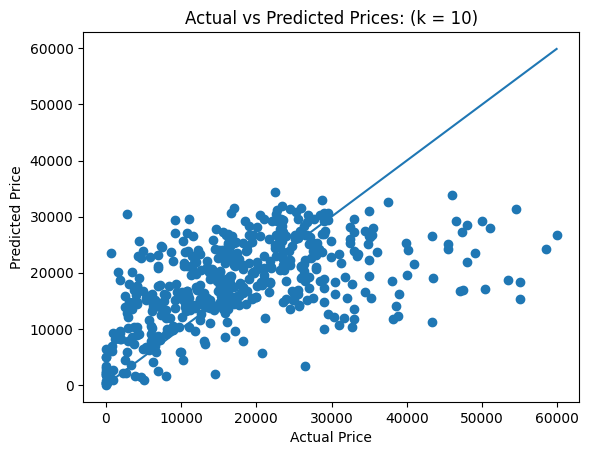

k = 25, MSE = 99171237.14


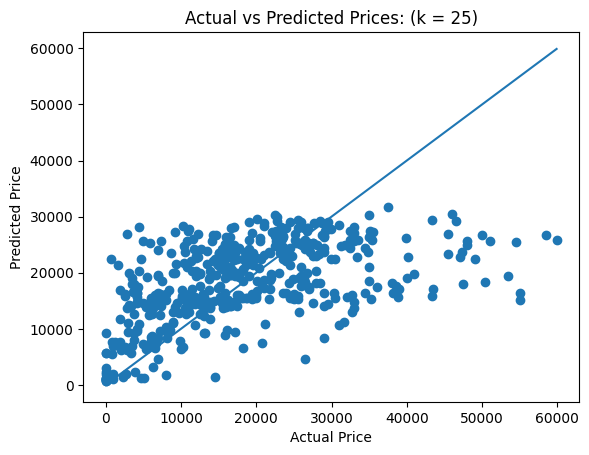

k = 50, MSE = 98607714.05


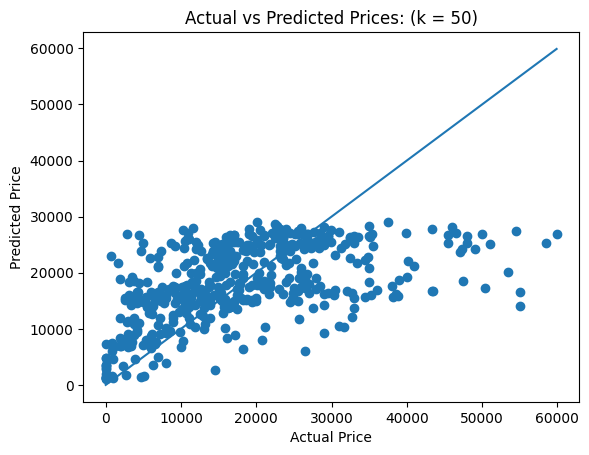

k = 100, MSE = 99360308.72


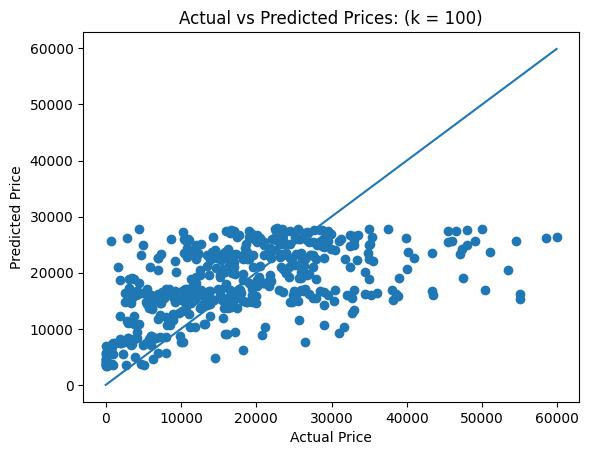

k = 300, MSE = 100517959.05


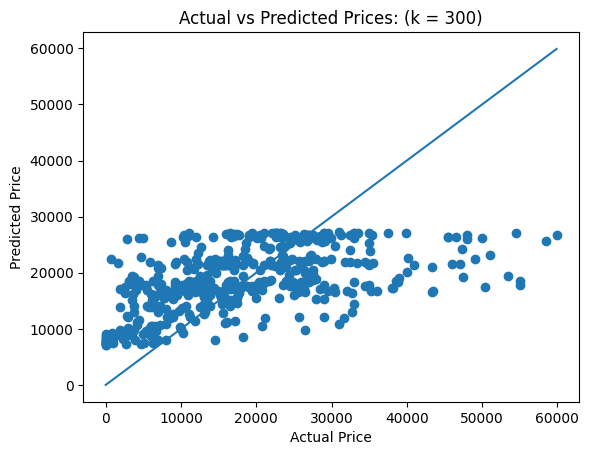

In [14]:
#Q3.4

ks = [3, 10, 25, 50, 100, 300]
results = []

for k in ks:
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  results.append((k,mse))

  print(f"k = {k}, MSE = {mse:.2f}")

  #Scatterplot code
  plt.figure()
  plt.scatter(y_test, y_pred)
  plt.xlabel("Actual Price")
  plt.ylabel("Predicted Price")
  plt.title(f"Actual vs Predicted Prices: (k = {k})")

  min_val = min(y_test.min(), y_pred.min())
  max_val = max(y_test.max(), y_pred.max())
  plt.plot([min_val, max_val], [min_val, max_val])

  plt.show()


**Q3.4 Answer:**

**As k increases, the predictions become smoother and less variable. For small values of k, the model follows the data more closely and predictions are more spread out, leading to higher variance and potential for overfitting. As k increases, the predictions become more condensed toward the middle range of prices. The model becomes less sensitive to individual data points and begins to underfit. It fails to capture high-priced cars correctly.**

In [15]:
#Q3.5

ks = [3, 10, 25, 50, 100, 300]
results = []

for k in ks:
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  results.append((k,mse))

results_df = pd.DataFrame(results, columns=["k", "MSE"])

optimal_row = results_df.loc[results_df["MSE"].idxmin()]
optimal_k = optimal_row["k"]
lowest_mse = optimal_row["MSE"]

print("All results: ")
print(results_df)

print("\nOptimal k:", optimal_k)
print("Lowest MSE: ", lowest_mse)

All results: 
     k           MSE
0    3  1.212799e+08
1   10  1.020165e+08
2   25  9.917124e+07
3   50  9.860771e+07
4  100  9.936031e+07
5  300  1.005180e+08

Optimal k: 50.0
Lowest MSE:  98607714.0473696


**Q3.5 Answer:**

**The optimal k is 50 for this data!**

**Q3.6 Answer:**

**As k varied, there were clear differences in the plots. For small values of k, such as 3, the model overfits the data. The predicted values were more spread out following individual data points, leading to higher variance. As k increased, the predictions became smoother and more condensed towards the average price. For large values of k, like 300, the model underfit the data because it was too simple to capture important variation especially for high-priced cars. The optimal k of 50 balanced overfitting and underfitting.**

**Q4.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$-NN classification or regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has the best Mean Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the RMSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q5.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be. Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion matrix for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying proportions/probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q6.** This is a case study using $k$ nearest neighbor regression for imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to column filter the dataframe to those variables.
2. Set use `.isnull()` and `.loc` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Describe what you see.

In [17]:
#Q6.1

df_full = pd.read_csv("/content/data/airbnb_hw.csv")
cols = ["Review Scores Rating", "Price", "Beds"]
df = df_full.loc[:, cols].copy()

In [22]:
#Q6.2

missing_mask = df["Review Scores Rating"].isnull()
df_missing = df.loc[missing_mask].copy()
df_nonmissing = df.loc[~missing_mask].copy()

In [19]:
#Q6.3

df_complete = df.dropna(axis=0, how="any").copy()

In [25]:
#Q6.4

df_complete = df_complete.copy()

df_complete["Price"] = (
    df_complete["Price"]
    .astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

df_complete["Price"] = pd.to_numeric(df_complete["Price"], errors="coerce")
df_complete["Beds"] = pd.to_numeric(df_complete["Beds"], errors="coerce")
df_complete["Review Scores Rating"] = pd.to_numeric(df_complete["Review Scores Rating"], errors="coerce")

df_complete = df_complete.dropna(axis=0, how="any").copy()

X = df_complete[["Price", "Beds"]].copy()
Y = df_complete[["Review Scores Rating"]].copy()

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.20, random_state=1234
)

k_values = list(range(1,31))
sse_list = []

for k in k_values:
  model = KNeighborsRegressor(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  sse = np.sum((y_test.values - y_pred) ** 2)
  sse_list.append(sse)

best_index = int(np.argmin(sse_list))
best_k = k_values[best_index]
best_sse = sse_list[best_index]

print(f"Best k (minimizes SSE on test set): {best_k}")
print(f"Best test SSE: {best_sse:.2f}")


Best k (minimizes SSE on test set): 30
Best test SSE: 347923.48


**Q6.4 Answer:**

**To choose k, I performed the train/test split and evaluated  multiple values of k from 1-30. For each value of k, I fit a k-NN model on the training data and computed the sum of squared errors (SSE) on the test set. I selected the value of k that minimized the test SSE. This approach ensures that the chosen k generalizes well to unseen data and balances overfitting and underfitting.**

In [26]:
#Q6.5

X_all = df_complete[["Price", "Beds"]]
y_all = df_complete["Review Scores Rating"]

scaler = MinMaxScaler()
X_all_scaled = scaler.fit_transform(X_all)

model = KNeighborsRegressor(n_neighbors=best_k)
model.fit(X_all_scaled, y_all)

X_missing = df_missing[["Price", "Beds"]].copy()

X_missing["Price"] = (
    X_missing["Price"].astype(str)
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

X_missing = X_missing.apply(pd.to_numeric, errors="coerce").dropna()

X_missing_scaled = scaler.transform(X_missing)

preds = model.predict(X_missing_scaled)

df.loc[X_missing.index, "Review Scores Rating"] = preds

print("Number of imputed ratings:", len(preds))

Number of imputed ratings: 8282


**Q6.5 Answer:**

**Using the optimal value of k, I trained a k-NN regression model on complete cases and predicted the missing review ratings based on Price and Beds. A total of 8,282 missing ratings were imputed and inserted back into the dataset.**

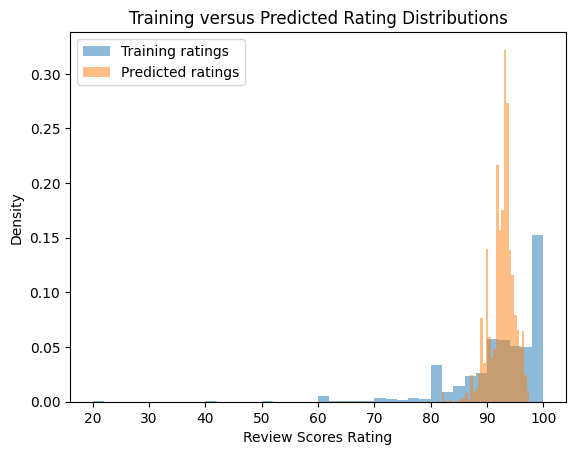

In [27]:
#Q6.6

import matplotlib.pyplot as plt

train_ratings = y_all

pred_ratings = preds

plt.figure()
plt.hist(train_ratings, bins=40, density=True, alpha=0.5, label="Training ratings")
plt.hist(pred_ratings, bins=40, density=True, alpha=0.5, label="Predicted ratings")
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.title("Training versus Predicted Rating Distributions")
plt.legend()
plt.show()

**Q6.6 Answer:**

**The predicted ratings have a similar, overall shape but are more concentrated and less spread out than the training ratings. The model smooths the predictions towards the average, reducing variability and slightly, underfitting extreme values.**

**Q7.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and use $k$-NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a list of matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set? Report the accuracy, compute a confusion matrix, and explain your findings.
6. For your confusion matrix, which mistakes are most likely? Do you find any interesting patterns?
7. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)